In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape to add channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10


2025-08-18 03:32:51.597143: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


  11/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.1281 - loss: 2.2621

2025-08-18 03:32:52.763339: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 17981568 exceeds 10% of free system memory.
2025-08-18 03:32:52.763373: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 17981568 exceeds 10% of free system memory.
2025-08-18 03:32:52.782924: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 17981568 exceeds 10% of free system memory.
2025-08-18 03:32:52.783167: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 17981568 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.9571 - loss: 0.1397 - val_accuracy: 0.9841 - val_loss: 0.0499
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9861 - loss: 0.0455 - val_accuracy: 0.9884 - val_loss: 0.0349
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9897 - loss: 0.0314 - val_accuracy: 0.9887 - val_loss: 0.0336
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9922 - loss: 0.0251 - val_accuracy: 0.9892 - val_loss: 0.0292
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9943 - loss: 0.0175 - val_accuracy: 0.9903 - val_loss: 0.0305
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9952 - loss: 0.0140 - val_accuracy: 0.9915 - val_loss: 0.0315
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9965 - loss: 0.0109 - val_accuracy: 0.9859 - val_loss: 0.0505
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9965 - loss: 0.01

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 2s - 5ms/step - accuracy: 0.9920 - loss: 0.0347

Test accuracy: 0.9919999837875366


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


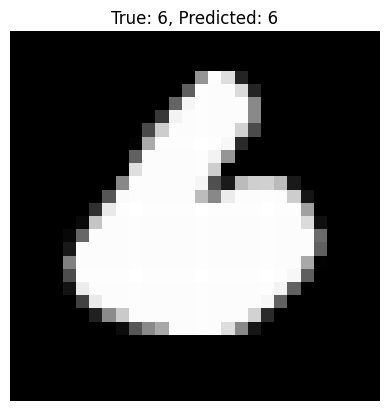

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


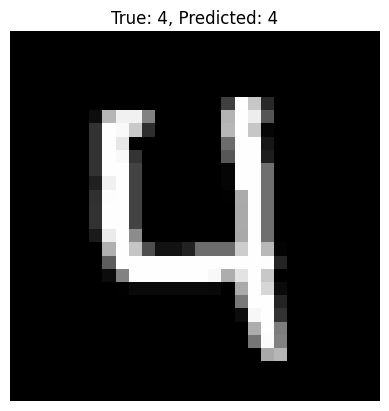

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


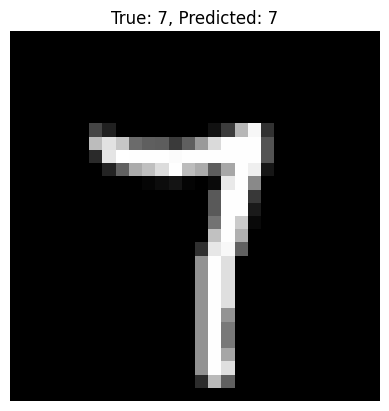

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


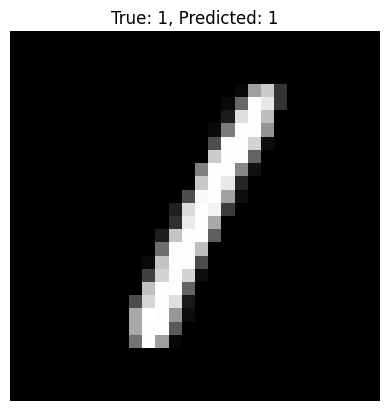

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


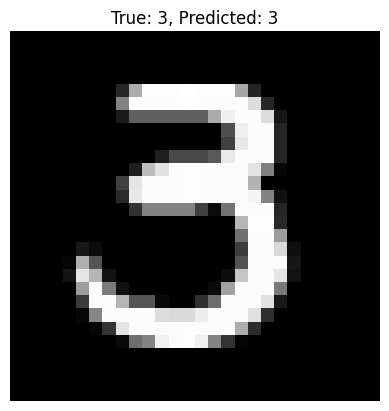

In [10]:
import numpy as np

# Pick a few random images from the test set
num_samples = 5
random_indices = np.random.choice(len(x_test), num_samples, replace=False)

for i, idx in enumerate(random_indices):
    img = x_test[idx]
    label = y_test[idx]

    # Model expects batch dimension
    img_batch = np.expand_dims(img, axis=0)

    # Predict class probabilities
    predictions = model.predict(img_batch)
    predicted_label = np.argmax(predictions)

    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"True: {label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


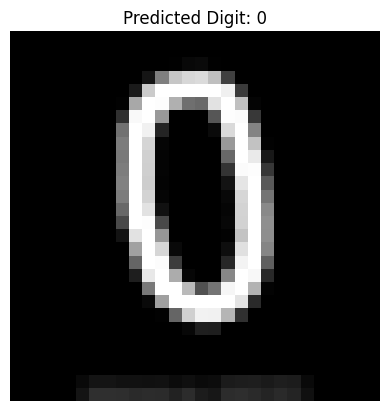

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from PIL import Image

img_path = 'my_digit.jpg'
img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
img_array = image.img_to_array(img)
img_array = 255 - img_array
img_array /= 255.0
img_batch = np.expand_dims(img_array, axis=0)

def preprocess_digit_image(img_path):
    img = Image.open(img_path).convert('L')  # Grayscale
    img = img.resize((28, 28))               # Resize to MNIST size
    img_array = np.array(img)

    # Invert colors if background is white
    if img_array.mean() > 127:
        img_array = 255 - img_array

    img_array = img_array / 255.0            # Normalize
    img_array = img_array.reshape(1, 28, 28, 1)  # Shape for model
    return img_array

# Preprocess and predict
processed_img = preprocess_digit_image(img_path)
predictions = model.predict(processed_img)
predicted_label = np.argmax(predictions)

# Show image and prediction
plt.imshow(processed_img.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_label}")
plt.axis('off')
plt.show()
